In [1]:
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt # note, this is often imported as "plt"

# special code for Jupyter Notebook; allows in-line plotting (may not be needed on your machine)
%matplotlib inline

# Let's create an artificial dataset with some relationship

In [2]:
np.random.seed(2)
A=np.random.normal(scale=2.,size=(300))

In [3]:
np.random.seed(1)
B=A*1.5+np.random.normal(scale=4,size=(300))

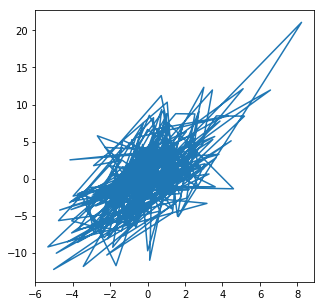

In [4]:
fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1) # rows, columns, current figure

# use that axes object to plot
ax.plot(A, B)

The default is a line plot. Below are two ways of creating a scatter plot

Text(0, 0.5, 'B')

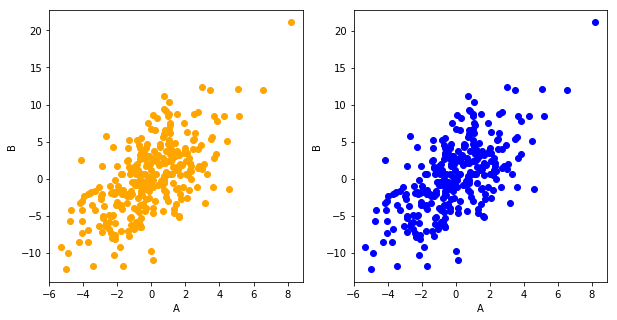

In [5]:
fig=plt.figure(figsize=(10,5)) # 10in width, 5in height 
ax = fig.add_subplot(1,2,1) # rows, columns, current figure

# use that axes object to plot
ax.plot(A, B, 'o',c='orange')
ax.set_xlabel('A')
ax.set_ylabel('B')

ax2 = fig.add_subplot(1,2,2) # rows, columns, current figure

# use that axes object to plot
plt.scatter(A, B,c='blue',marker='o')
ax2.set_xlabel('A')
ax2.set_ylabel('B')

What if we had another dimension to the data that we wanted to plot?

In [6]:
np.random.seed(3)
C=2.*A+3.*B+np.random.randn(300)

Text(0.5, 1.0, 'Scatter between A and B colored by C \n')

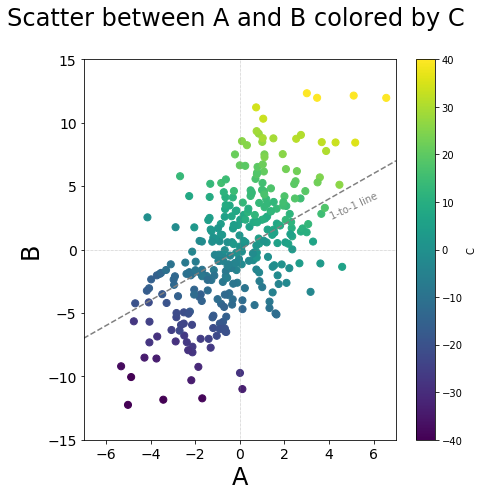

In [7]:
fig=plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1) # rows, columns, current figure
ax.tick_params(axis='both', labelsize=14)               #set parameters like labelsize for tick marks
ax.plot([-7,7],[0,0],':',linewidth=0.5,c='gray')        #thinly show where zero lines are
ax.plot([0,0],[-15,15],':',linewidth=0.5,c='gray')      #thinly show where zero lines are
ax.plot([-7,7],[-7,7],'--',c='gray')                    #show 1 to 1 line
ax.text(4,4,'1-to-1 line',rotation=25,color='gray')
scat_plot=ax.scatter(A, B, c=C,s=50,vmin=-40,vmax=40) #c is for color #vmin sets mincolor #vmax sets maxcolor
ax.set_xlabel('A',fontsize=24)
ax.set_ylabel('B',fontsize=24)
cbar=plt.colorbar(scat_plot)
cbar.set_label('C')
ax.set_xlim((-7,7))
ax.set_ylim((-15,15))
ax.set_title('Scatter between A and B colored by C \n',fontsize=24)

## Same information in 3D axes

A 3D plot requires the matplotlib 3D plotting library.  Import it by typing:  
```import mpl_toolkits.mplot3d```

Then specify a 3D axes instance using the ```projection=``` keyword.

**\*\*\* Note:  this ```projection=``` syntax is also how we will specify a map projection next week! \*\*\***

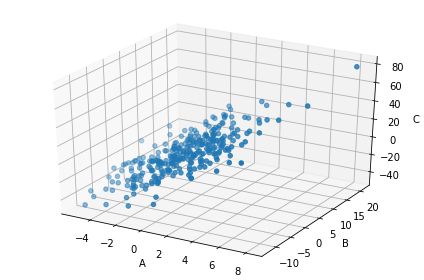

In [8]:
import mpl_toolkits.mplot3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A,B,C)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
fig.tight_layout()

## Next, let's try making surface plots

In [9]:
X_edges=np.arange(-8.5,9.0,2)
print(X_edges)

[-8.5 -6.5 -4.5 -2.5 -0.5  1.5  3.5  5.5  7.5]


In [10]:
Y_edges=np.arange(-14.5,15,2)

In [11]:
TwoDhist_of_AB,xedges,yedges=np.histogram2d(A,B,bins=(X_edges,Y_edges))

In [12]:
# take the transpose
TwoDhist_of_AB=TwoDhist_of_AB.T

In [13]:
X,Y=np.meshgrid(xedges,yedges)
X.shape

(15, 9)

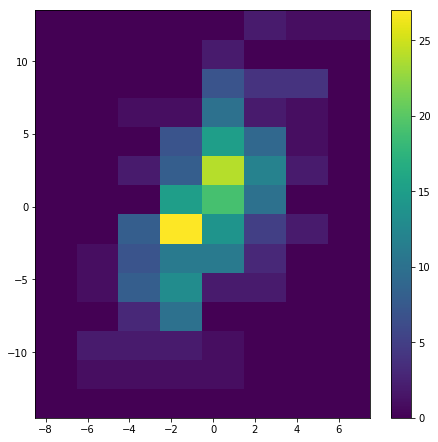

In [14]:
fig=plt.figure(figsize=(7.5,7.5))
ax=fig.add_subplot(1,1,1)
colormesh=ax.pcolormesh(X,Y,TwoDhist_of_AB)
cbar=plt.colorbar(colormesh)

In [15]:
X.shape

(15, 9)

In [16]:
TwoDhist_of_AB.shape

(14, 8)

In [17]:
X_center=(xedges[:-1]+xedges[1:])/2
Y_center=(yedges[:-1]+yedges[1:])/2
X_contour,Y_contour=np.meshgrid(X_center,Y_center)

Note the option to specify a different [color map](https://matplotlib.org/tutorials/colors/colormaps.html) through the ```cmap=``` keyword
* Default is ```viridis```
* You can reverse a color map using ```_r```:  ```cmap=viridis_r```

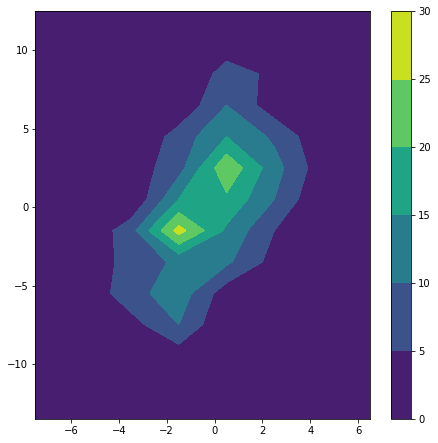

In [18]:
fig=plt.figure(figsize=(7.5,7.5))
ax=fig.add_subplot(1,1,1)
contourmap=ax.contourf(X_contour,Y_contour,TwoDhist_of_AB,levels=[0,5,10,15,20,25,30])

#contourmap=ax.contourf(X_contour,Y_contour,TwoDhist_of_AB,levels=[0,5,10,15,20,25,30],cmap='YlOrRd')
#contourmap=ax.contourf(X_contour,Y_contour,TwoDhist_of_AB,levels=[0,5,10,15,20,25,30],cmap='viridis_r')

cbar=plt.colorbar(contourmap)

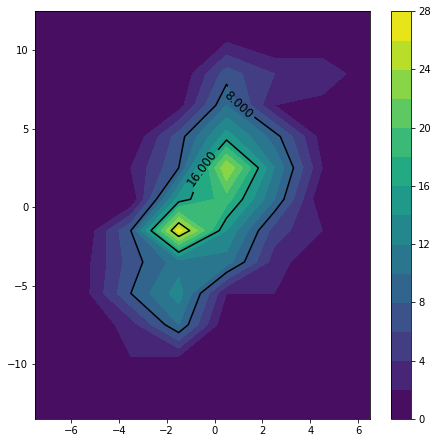

In [19]:
fig=plt.figure(figsize=(7.5,7.5))
ax=fig.add_subplot(1,1,1)
contourmap=ax.contourf(X_contour,Y_contour,TwoDhist_of_AB,levels=np.arange(0,30,2))
contours=ax.contour(X_contour,Y_contour,TwoDhist_of_AB,levels=[8,16,24],colors='k')
ax.clabel(contours, fontsize=12, inline=1)
cbar=plt.colorbar(contourmap)

## Tips for saving figures

1. Before saving, use the ```fig.tight_layout()``` command to fill up the full ```figsize``` specification


2. Increase the font sizes to be more legible...
  * For axis ticks, use ```ax.tick_params(labelsize=18)```
  * For color bar ticks, use ```cbar.ax.tick_params(labelsize=18)```
  * For axis labels, use ```ax.set_xlabel('label', fontsize=18)``` and ```ax.set_ylabel('label', fontsize=18)```


3. Use the ```fig.savefig()``` command.  Python will automatically recognize the file extension (.png, .pdf, .jpg, etc.)
  * For raster file types, you can specify ```dpi=```
  * Adding ```transparent=True``` to the function makes the background transparent (good for powerpoints...)
  * Adding ```bbox_inches='tight'``` to the function crops all miscellaneous white space around figure (bbox stands for bounding box)


4. You can customize some of these default settings in the [.matplotlibrc file](https://matplotlib.org/users/customizing.html)

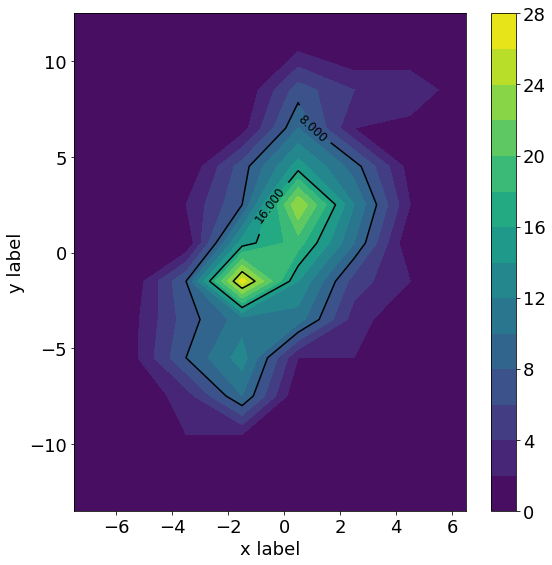

In [20]:
fig=plt.figure(figsize=(7.5,7.5))
ax=fig.add_subplot(1,1,1)
contourmap=ax.contourf(X_contour,Y_contour,TwoDhist_of_AB,levels=np.arange(0,30,2))
contours=ax.contour(X_contour,Y_contour,TwoDhist_of_AB,levels=[8,16,24],colors='k')
ax.clabel(contours, fontsize=12, inline=1)
cbar=plt.colorbar(contourmap)

# 1
fig.tight_layout()

# 2
ax.tick_params(labelsize=18)
cbar.ax.tick_params(labelsize=18)
ax.set_xlabel('x label', fontsize=18)
ax.set_ylabel('y label', fontsize=18)

# 3
fig.savefig('contour_map_example.png', dpi=300, bbox_inches='tight', transparent=True)

# Other plotting options to explore

There are lots of other python plotting libraries that take matplotlib and make it prettier.  A couple of them include:

* [seaborn](https://seaborn.pydata.org/):  Plotting system aimed at making beautiful plots with minimal code (also has great color map support)

* [ggplot](http://ggplot.yhathq.com/):  Plotting system based on R's ggplot and the [*Grammar of Graphics*](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448)

To use these packages, you'll need to install them simultaneously within your Anaconda build.  From the terminal shell, you can type:  
```conda install seaborn ggplot```

Or you can use the Anaconda Navigator to install them.